In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

%matplotlib inline

In [2]:
# data output display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 12)
pd.set_option('display.precision', 3) 

# Dataset

In [3]:
federal_rates = pd.read_csv('federal.csv')
mortgage_rates = pd.read_csv('mortgage.csv')

# Merging the data

In [4]:
federal_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 4 columns):
DATE            904 non-null object
INTEREST        752 non-null float64
UNEMPLOYMENT    752 non-null float64
INFLATION       710 non-null float64
dtypes: float64(3), object(1)
memory usage: 28.3+ KB


In [5]:
mortgage_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 2 columns):
DATE        549 non-null object
MORTGAGE    549 non-null float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [7]:
rates = pd.merge(federal_rates, mortgage_rates, on='DATE', how='right')
rates

,DATE,INTEREST,UNEMPLOYMENT,INFLATION,MORTGAGE
0,1971-04-01,4.15,5.9,5.0,7.310
1,1971-05-01,4.63,5.9,5.2,7.425
2,1971-06-01,4.91,5.9,4.9,7.530
3,1971-07-01,5.31,6.0,4.9,7.604
4,1971-08-01,5.56,6.1,4.6,7.698
5,1971-09-01,5.55,6.0,4.4,7.688
...,...,...,...,...,...
543,2016-07-01,0.39,4.9,2.2,3.440
544,2016-08-01,0.40,4.9,2.3,3.435
545,2016-09-01,0.40,4.9,2.2,3.460


In [8]:
#check for data types and null values
rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 548
Data columns (total 5 columns):
DATE            549 non-null object
INTEREST        549 non-null float64
UNEMPLOYMENT    549 non-null float64
INFLATION       549 non-null float64
MORTGAGE        549 non-null float64
dtypes: float64(4), object(1)
memory usage: 25.7+ KB


In [9]:
rates['DATE'] = pd.to_datetime(rates['DATE'])

# Scatterplot

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


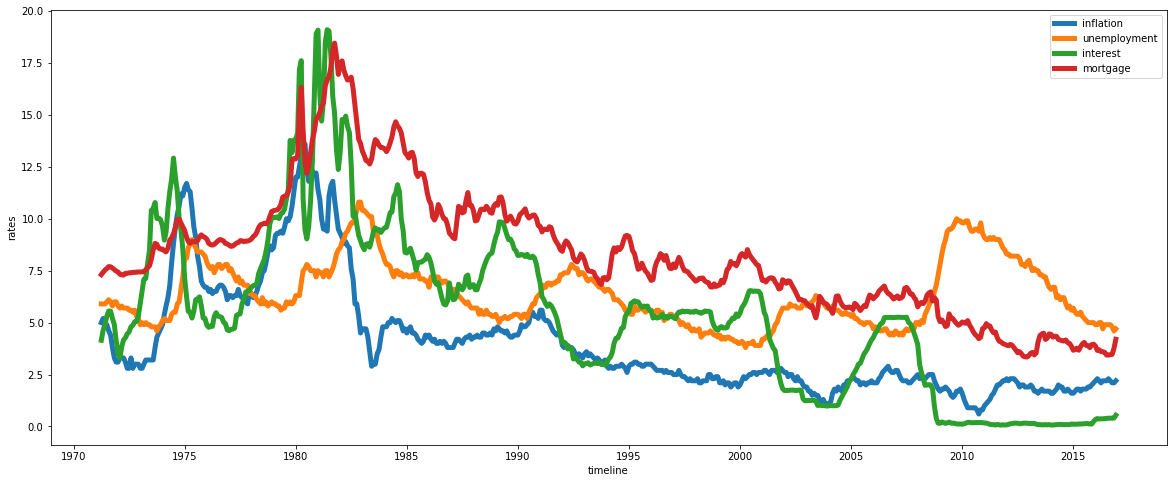

In [10]:
# matplotlib date format modules
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# define the date format
myFmt = mdates.DateFormatter('%Y')

# plot the data
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(rates['DATE'], rates['INFLATION'], label='inflation', linewidth=5)
ax.plot(rates['DATE'], rates['UNEMPLOYMENT'], label='unemployment', linewidth=5)
ax.plot(rates['DATE'], rates['INTEREST'], label='interest', linewidth=5)
ax.plot(rates['DATE'], rates['MORTGAGE'], label='mortgage', linewidth=5)

ax.set(ylabel='rates', xlabel='timeline')
# ax.set_title('US Metrics from {} to {}'.format(inflation_rates['DATE'].min().strftime('%Y'), inflation_rates['DATE'].max().strftime('%Y')))
ax.legend()

# inform axis that it is plotting dates
ax.xaxis_date() 

# use format specified as myFmt
ax.xaxis.set_major_formatter(myFmt);

This scatterplot represents the different inflation rates in the US over time, between 1954 and 2017.  It shows a downward trend for the majority of the timeline, with the maximum rate peaking close to 14%.  There are a few "mini" peaks, and we need to check if dates correspond to financial crisis in the US (ie. early and mid 1980's, 1990, 2000, and 2007) 

# Inflation Rate

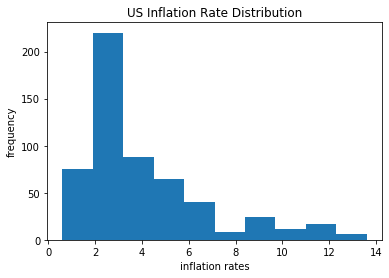

In [10]:
# histogram
plt.hist(inflation_rates['Inflation Rate'], bins=10)
plt.title('US Inflation Rate Distribution')
plt.xlabel('inflation rates')
plt.ylabel('frequency');

From this spread, it is comforting to know that +7% rates are not the most common.  It looks like a gamma distribution.  

In [19]:
# QQ plot

# 
inflation = inflation_rates['Inflation Rate']
# write a function to standardize, pick avg and std, for every data point subtract mean and divide by std

# Sorting the values in ascending order.
inflation.sort_values()

# Making two variables.
rand1 = np.random.normal(0, 1, len(inflation_rates))
rand2 = np.random.gamma(5,1, len(inflation_rates))

# Sorting the values in ascending order.
rand1.sort()
rand2.sort()

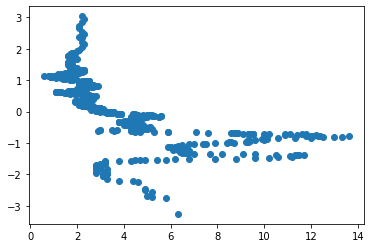

In [20]:
# Plotting the variable rand1 against norm in qqplots.
plt.plot(inflation, rand1, "o") 
plt.show()

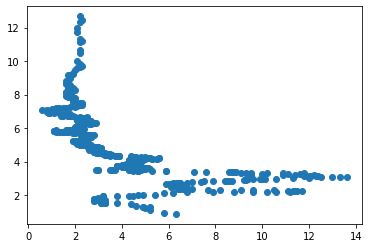

In [21]:
# Plotting the variable rand2 against norm in qqplots.
plt.plot(inflation, rand2, "o") 
plt.show()

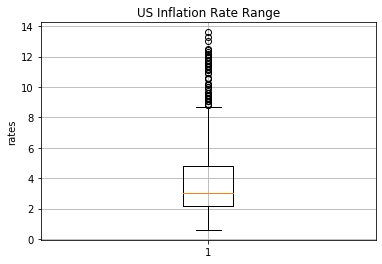

In [22]:
# boxplot
plt.boxplot(inflation_rates['Inflation Rate'].dropna())
plt.title('US Inflation Rate Range')
plt.ylabel('rates')
plt.grid();

In [23]:
mean = inflation_rates['Inflation Rate'].mean()
median = inflation_rates['Inflation Rate'].median()
rate_min = inflation_rates['Inflation Rate'].min()
rate_max = inflation_rates['Inflation Rate'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

mean: 4.02454873646209
median: 3.0
min: 0.6
max: 13.6


# Unemployment Rate

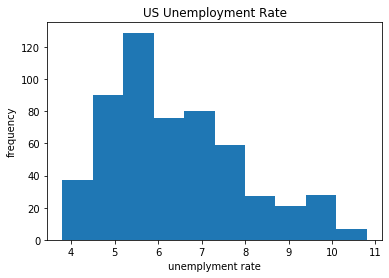

In [50]:
# histogram
plt.hist(inflation_rates['Unemployment Rate'], bins=10)
plt.title('US Unemployment Rate')
plt.xlabel('unemplyment rate')
plt.ylabel('frequency');

Looks like another gamma distribution.

In [24]:
# QQ plot

# 
unemployment = inflation_rates['Unemployment Rate']

# Sorting the values in ascending order.
unemployment.sort_values()

351     3.8
359     3.9
358     3.9
357     3.9
356     3.9
352     4.0
       ... 
146    10.3
141    10.4
144    10.4
145    10.4
143    10.8
142    10.8
Name: Unemployment Rate, Length: 554, dtype: float64

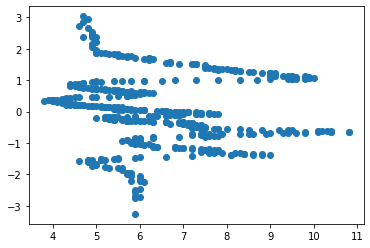

In [25]:
# Plotting the variable rand1 against norm in qqplots.
plt.plot(unemployment, rand1, "o") 
plt.show()

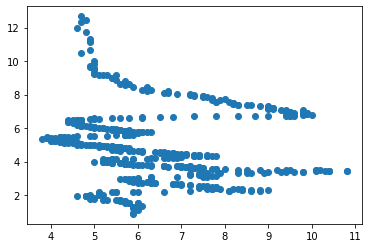

In [26]:
# Plotting the variable rand2 against norm in qqplots.
plt.plot(unemployment, rand2, "o") 
plt.show()

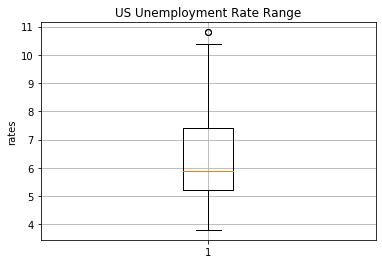

In [27]:
# boxplot
plt.boxplot(inflation_rates['Unemployment Rate'])
plt.title('US Unemployment Rate Range')
plt.ylabel('rates')
plt.grid();

In [28]:
mean = inflation_rates['Unemployment Rate'].mean()
median = inflation_rates['Unemployment Rate'].median()
rate_min = inflation_rates['Unemployment Rate'].min()
rate_max = inflation_rates['Unemployment Rate'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

mean: 6.368411552346567
median: 5.9
min: 3.8
max: 10.8


# Effective Federal Funds Rate

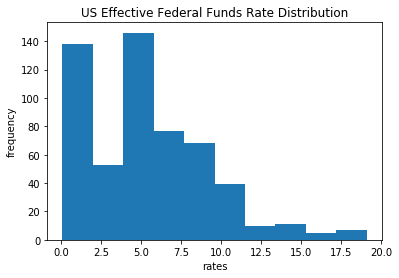

In [51]:
# histogram
plt.hist(inflation_rates['Effective Federal Funds Rate'], bins=10)
plt.title('US Effective Federal Funds Rate Distribution')
plt.xlabel('rates')
plt.ylabel('frequency');

In [30]:
# QQ plot

# 
RFF = inflation_rates['Effective Federal Funds Rate']

# Sorting the values in ascending order.
RFF.sort_values()

486     0.07
491     0.07
489     0.07
516     0.07
517     0.07
492     0.08
       ...  
127    17.82
124    18.52
119    18.90
126    19.04
120    19.08
125    19.10
Name: Effective Federal Funds Rate, Length: 554, dtype: float64

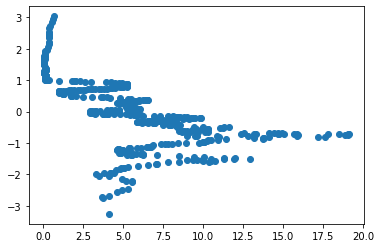

In [31]:
# Plotting the variable rand1 against norm in qqplots.
plt.plot(RFF, rand1, "o") 
plt.show()

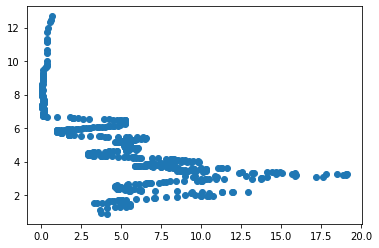

In [32]:
# Plotting the variable rand2 against norm in qqplots.
plt.plot(RFF, rand2, "o") 
plt.show()

In [ ]:
# boxplot
plt.boxplot(inflation_rates['Effective Federal Funds Rate'])
plt.title('US Federal Fund Rate Range')
plt.ylabel('rates')
plt.grid();

In [ ]:
mean = inflation_rates['Effective Federal Funds Rate'].mean()
median = inflation_rates['Effective Federal Funds Rate'].median()
rate_min = inflation_rates['Effective Federal Funds Rate'].min()
rate_max = inflation_rates['Effective Federal Funds Rate'].max()

print('mean: {}\nmedian: {}\nmin: {}\nmax: {}'.format(mean, median, rate_min, rate_max))

# Summary of Histogram Plots

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(inflation_rates['Inflation Rate'])
plt.title('Histogram')
plt.xlabel('inflation rates')
plt.ylabel('frequency')

plt.subplot(2,2,2)
plt.hist(inflation_rates['Unemployment Rate'])
plt.title('Histogram')
plt.xlabel('unemployment rates')
plt.ylabel('frequency')

plt.subplot(2,2,3)
plt.hist(inflation_rates['Effective Federal Funds Rate'])
plt.title('Histogram')
plt.xlabel('federal reserve funds rate')
plt.ylabel('frequency')

plt.tight_layout();